<a href="https://colab.research.google.com/github/cincinnatilibrary/collection-analysis/blob/master/misc/bibliocommons_api_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import Image
import getpass
import requests
import json
from IPython.display import Image

# this is the CHPL library id
id = "cincinnatilibrary"

In [2]:
bc_key = getpass.getpass('bc api key:')

bc api key:··········


In [3]:
r = requests.get(
    url = f"https://api.bibliocommons.com/v1/libraries/{id}",
    params = {
        "api_key": bc_key
    }
)

print(r.status_code, r.text)

200 {"library":{"id":"cincinnatilibrary","name":"Cincinnati & Hamilton County Public Library","abbrev":"CHPL","catalog_url":"https://cincinnatilibrary.bibliocommons.com"}}


In [4]:
# testing the titles API ...
# NOTE: the id number returned in the reponse contains 
# https://cincinnatilibrary.bibliocommons.com/item/show/3720160170
# # converts into this ..
# https://cincinnatilibrary.bibliocommons.com/v2/record/S170C3720160

titles_base_url = f"https://api.bibliocommons.com/v1/titles"

r = requests.get(
    url=titles_base_url,
    params={
        "q": "python programming",
        "library": id,
        "search_type": "keyword",
        "api_key": bc_key
    }    
)

print(r.status_code, json.dumps(r.json(), indent=2), sep="\n")

200
{
  "count": 93,
  "limit": 10,
  "pages": 10,
  "page": 1,
  "titles": [
    {
      "id": "3658850170",
      "title": "Python Programming",
      "sub_title": "How to Code Python Fast in Just 24 Hours With 7 Simple Steps",
      "format": {
        "id": "EBOOK",
        "name": "eBook"
      },
      "details_url": "https://cincinnatilibrary.bibliocommons.com/item/show/3658850170",
      "availability": null,
      "publication_date": "2013",
      "authors": [
        {
          "name": "Scotts, Jason"
        }
      ],
      "isbns": [
        "9781630222468",
        "1630222461"
      ],
      "call_number": "eBook",
      "jacket_cover": {
        "url": "https://d2snwnmzyr8jue.cloudfront.net/csp_9781630222468_180.jpeg",
        "default": "https://cor-cdn-static.bibliocommons.com/assets/default_covers/icon-book-eformat-21fed9c79996fb130cd45e5edad3686f.png"
      },
      "primary_language": {
        "name": "English"
      },
      "original_script": {
        "sub_tit

In [5]:
titles_id_base_url = "https://api.bibliocommons.com/v1/titles/{title_id}"

r_title = requests.get(
    url=titles_id_base_url.format(
        title_id = str(
            r.json()['titles'][0]['id']
        )
    ),
    params={
      "api_key": bc_key
    }
)

print(r_title.status_code, json.dumps(r_title.json(), indent=2), sep="\n")

200
{
  "title": {
    "id": "3658850170",
    "title": "Python Programming",
    "sub_title": "How to Code Python Fast in Just 24 Hours With 7 Simple Steps",
    "format": {
      "id": "EBOOK",
      "name": "eBook"
    },
    "details_url": "https://any.bibliocommons.com/item/show/3658850170",
    "availability": null,
    "publication_date": "2013",
    "authors": [
      {
        "name": "Scotts, Jason"
      }
    ],
    "isbns": [
      "9781630222468",
      "1630222461"
    ],
    "call_number": "eBook",
    "jacket_cover": {
      "url": "https://d2snwnmzyr8jue.cloudfront.net/csp_9781630222468_180.jpeg",
      "default": "https://cor-cdn-static.bibliocommons.com/assets/default_covers/icon-book-eformat-21fed9c79996fb130cd45e5edad3686f.png"
    },
    "description": "Are you fed up with reading long, boring, lengthy paragraphs after paragraphs of text and want to get up and running in Python as soon as possible? Well, you're not alone. I for one hate having to read through mas

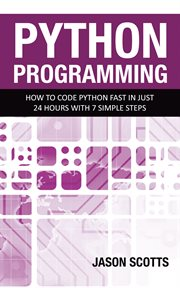

In [6]:
try:
  r_jacket = requests.get(
      url = r_title.json()['title']['jacket_cover']['url']
  )
except:
  pass

Image(r_jacket.content)